
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

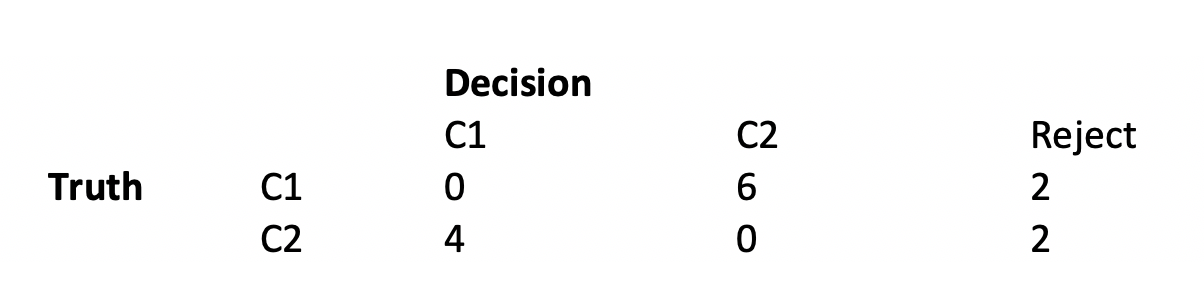

<img style="transform: rotate(90deg); width:1000px" src="Q1.jpg" alt="sieve shaker" title="Title text" />

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)

**Lift chart:**  
Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model. The way this is done is to sort the predicted probability values in descending order and bin them into deciles. Then for each decile, we calculate the percentage of cases in that decile which belong to the positive class. The ratio of these percentages to the percentage of positive class cases in the overall data gives us the lift values.  

Both Lift curve and ROC curve are similar in a way that area under each curve gives a measure of the predictive performance of the model. Both are different in a way that lift curve is plotted for a point measure of the model whereas an ROC curve is plotted for varying thresholds and gives the overall performance of a model

In direct marketing, lift curve are very useful as they give a good understanding of the exact of % of customers that we need to target. It gives the number of deciles that we need to target to reach our goals. A point measure observation in an ROC curve does not provide an insight into who are the customers but just gives an overall idea about the True positive rate of the model for that point measure.


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

A well calibrated model estimates class probabilities that are reflective of the underlying probability of the test data. In other words, if the expected probability of a particular is closer to the estimated probability of the class, then the model is said to be well calibrated.  

In health care industry, there are two types of uses for a predictive model  
1. Identifying the individuals with disease and others with no disease
2. Estimating the probability of an individual having the disease(risk of having a disease)  

If we are looking for just discriminating for the individuals with disease from individuals without disease, we are not very concerned about the calibration of the model. This is due to the fact that individuals with disease will always have a higher posterior probility and it does not matter if the proability is not the expected probability.  
But if we want to estimate the probability of an individual having a disease and to estimate future risk of the target population for that disease, it is important to have a well calibrated model as it would be very costly if the estimated probability is not closer to the expected probability.

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

In [2]:
import pandas as pd
import numpy as np
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score,auc,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
np.random.seed(1)
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

Populating the interactive namespace from numpy and matplotlib


In [3]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [4]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11811, 784) (11811,) (1972, 784) (1972,)


#### Logistic regression

In [5]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

probs_logreg = logreg.predict_proba(X_test)
pred_logreg = logreg.predict(X_test)
fpr_logreg, tpr_logreg, thresholds = roc_curve(y_test, probs_logreg[:, 1])

Probabilities of the class being digit 8 or 9 is given by pred_logreg array

#### Gaussian Naive Bayes

In [6]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

probs_nb = gnb.predict_proba(X_test)
pred_nb = gnb.predict(X_test)
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, probs_nb[:, 1])

Probabilities of the class being digit 8 or 9 is given by pred_nb array

####  MLP classifiers

In [7]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

probs_mlp = mlp.predict_proba(X_test)
pred_mlp = mlp.predict(X_test)
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, probs_mlp[:, 1])

Probabilities of the class being digit 8 or 9 is given by pred_mlp array

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

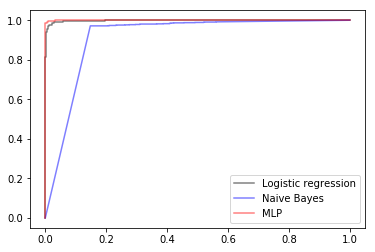

In [15]:
plt.plot(fpr_logreg,tpr_logreg,alpha = 0.5,color = 'black',label = 'Logistic regression')
plt.plot(fpr_nb,tpr_nb,alpha = 0.5,color = 'blue',label = 'Naive Bayes')
plt.plot(fpr_mlp,tpr_mlp,alpha = 0.5,color = 'red',label = 'MLP')
pylab.legend(loc='lower right')

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

Area under the curve

In [17]:
print('Area under the curve: logistic regression model',auc(fpr_logreg, tpr_logreg))
print('Area under the curve: Gaussian Naive Bayes model',auc(fpr_nb, tpr_nb))
print('Area under the curve: MLP model',auc(fpr_mlp, tpr_mlp))

Area under the curve: logistic regression model 0.9974254136258672
Area under the curve: Gaussian Naive Bayes model 0.9143834313075052
Area under the curve: MLP model 0.999183291417874


Accuracy

In [24]:
print('Accuracy: logistic regression model',round(accuracy_score(y_test, pred_logreg),2))
print('Accuracy: Gaussian Naive Bayes model',round(accuracy_score(y_test, pred_nb),2))
print('Accuracy: MLP model',round(accuracy_score(y_test, pred_mlp),2))

Accuracy: logistic regression model 0.98
Accuracy: Gaussian Naive Bayes model 0.89
Accuracy: MLP model 0.99


4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

Text(0.5,1,'MLP')

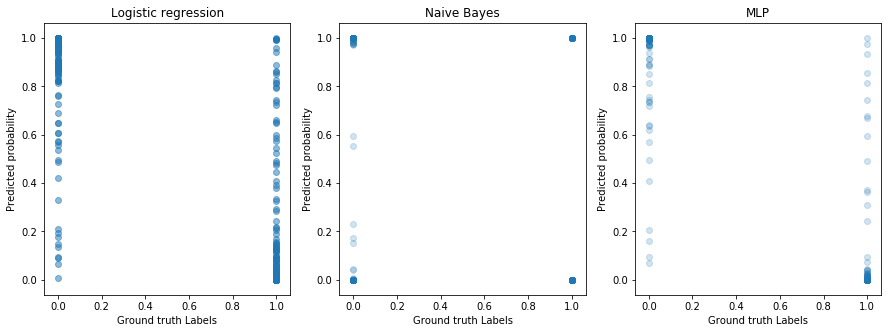

In [25]:
k_logreg = []
k_nb = []
k_mlp = []
for i in range(0,len(probs_logreg)):
    k_logreg.append(probs_logreg[i][0])
for i in range(0,len(probs_nb)):
    k_nb.append(probs_nb[i][0])
for i in range(0,len(probs_mlp)):
    k_mlp.append(probs_mlp[i][0])
    
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))    
ax1.scatter(y_test,k_logreg,alpha = 0.5)
ax1.set_xlabel('Ground truth Labels')
ax1.set_ylabel('Predicted probability')
ax1.set_title('Logistic regression')

ax2.scatter(y_test,k_nb,alpha = 0.2)
ax2.set_xlabel('Ground truth Labels')
ax2.set_ylabel('Predicted probability')
ax2.set_title('Naive Bayes')

ax3.scatter(y_test,k_mlp,alpha = 0.2)
ax3.set_xlabel('Ground truth Labels')
ax3.set_ylabel('Predicted probability')
ax3.set_title('MLP')

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

Estimated posterior probability values in Naive Bayes are more closer either towards 0 or towards 1 whereas probabilites in logistic regression and MLP are more spread out across the scale for each label.  
This might be due to the reason that Naive Bayes assumes independence between variables and Logistic regression and MLP does not make any such assumption

# Question 4 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

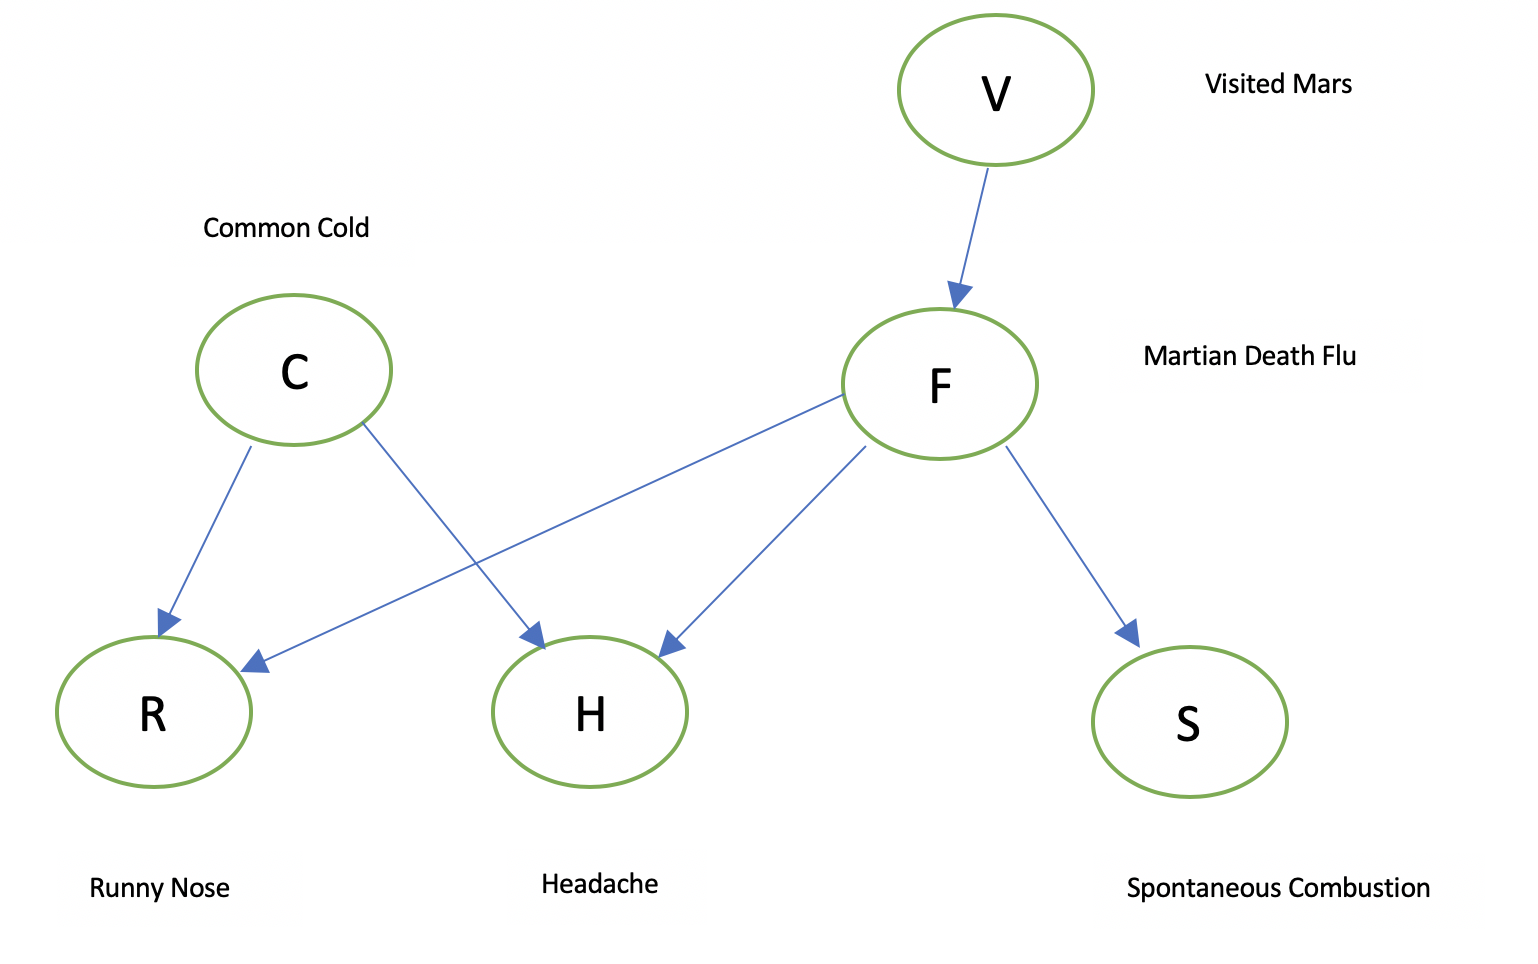

In [2]:
from IPython.display import Image
Image(filename='BBN4.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that the person has headache 

(b) (5 pts) Given that person visited mars, what is the probability that he has runny nose

(c) (5 pts) Given that person visited mars and has a runny nose, what is the probability that the person has common cold and not martian death flu.
